## CreditCardDefaulter Detection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path= 'C:/Users/SarithaSiva/AI/AI Final project/credit-card-default.csv'
ccdefaults = pd.read_csv(data_path)

print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)
print("\n", 50 * "-", "\n", "ccdefaults.shape", "\n", ccdefaults.shape)


print("\n", 50 * "-", "\n", "\nLower the column names")

ccdefaults.rename(columns=lambda x: x.lower(), inplace=True)
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


print("\n", 50 * "-", "\n", "\nChange the column names pay_0 and default payment next month")
ccdefaults.rename(columns={'pay_0':'pay_1','default payment next month':'default'}, inplace=True)
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 ccdefaults.head(10) 
    LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0      20000    2          2         1   24      2      2     -1     -1   
1     120000    2          2         2   26     -1      2      0      0   
2      90000    2          2         2   34      0      0      0      0   
3      50000    2          2         1   37      0      0      0      0   
4      50000    1          2         1   57     -1      0     -1      0   
5      50000    1          1         2   37      0      0      0      0   
6     500000    1          1         2   29      0      0      0      0   
7     100000    2          2         2   23      0     -1     -1      0   
8     140000    2          3         1   28      0      0      2      0   
9      20000    1          3         2   35     -2     -2     -2     -2   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...    

### Feature analysis

In [2]:
ccdefaults.isnull()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
ccdefaults.corr()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
limit_bal,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
sex,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
education,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
marriage,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
age,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
pay_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
pay_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
pay_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
pay_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
pay_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


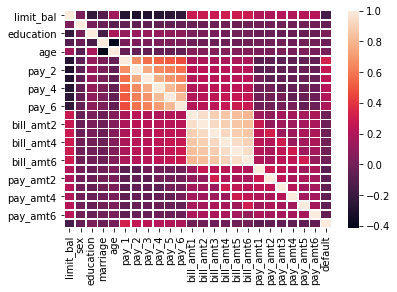

In [4]:
sns.heatmap(ccdefaults.corr(),linewidth=0.5)
plt.show()

#### Find unique values of some columns

In [5]:
print("\n", "ccdefaults['education'].unique()", "\n", ccdefaults['education'].unique())
print("\n", "ccdefaults['marriage'].unique()", "\n", ccdefaults['marriage'].unique())


 ccdefaults['education'].unique() 
 [2 1 3 5 4 6 0]

 ccdefaults['marriage'].unique() 
 [1 2 3 0]


In [6]:
print("\n", 50 * "-", "\n", "\nTransform the values for education and marital status")

# Base values: female, other_education, not_married
ccdefaults['grad_school'] = (ccdefaults['education'] == 1).astype('int')
ccdefaults['university'] = (ccdefaults['education'] == 2).astype('int')
ccdefaults['high_school'] = (ccdefaults['education'] == 3).astype('int')
ccdefaults['male'] = (ccdefaults['sex']==1).astype('int')
ccdefaults['married'] = (ccdefaults['marriage'] == 1).astype('int')

ccdefaults.drop(['sex','marriage', 'education'], axis=1, inplace=True)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 
Transform the values for education and marital status

 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      2      2     -1     -1     -2     -2       3913   
1     120000   26     -1      2      0      0      0      2       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57     -1      0     -1      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0     -1     -1      0      0     -1      11876   
8     140000   28      0      0      2      0      0      0      11285   
9      20000   35     -2     -2     -2     -2     -1     -1          0   

### Rename pay columns

In [7]:
print("\n", 50 * "-", "\n", "\nLower the column names for pay delay") 
# For pay_i features: if >0 then it means the customer was delayed i months ago
pay_features = ['pay_' + str(i) for i in range(1,7)]
for p in pay_features:
    ccdefaults[p] = (ccdefaults[p] > 0).astype(int)
print("\n", 50 * "-", "\n", "pay_features", "\n", pay_features)
print("\n", 50 * "-", "\n", "ccdefaults.head(10)", "\n", ccdefaults.head(10))
print("\n", 50 * "-", "\n", "ccdefaults.columns", "\n", ccdefaults.columns)


 -------------------------------------------------- 
 
Lower the column names for pay delay

 -------------------------------------------------- 
 pay_features 
 ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

 -------------------------------------------------- 
 ccdefaults.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1 

### Creating the Newdataset to test after training

In [8]:
#ccdefaults.head()
df_split = ccdefaults.sample(frac=0.3,random_state=200)
#df_split.drop(['sex','marriage', 'education'], axis=1, inplace=True)
#df_split.drop('default', axis=1)
#df_split.reset_index()
#df_split.head()


new_df = df_split.drop('default', axis=1)
new_df.head()

#new_df.to_csv('C:/Users/SarithaSiva/AI/AI Final project/credit-card-default2.csv')

,limit_bal,age,pay_1,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,grad_school,university,high_school,male,married
17269,130000,34,0,0,0,0,0,0,99891,101032,...,5300,4000,4000,4000,6100,0,1,0,0,1
22363,290000,27,0,0,0,0,0,0,168,569,...,1000,1000,200,265,500,1,0,0,0,0
23879,360000,27,0,0,0,0,0,0,2807,894,...,5970,1396,0,0,0,1,0,0,1,0
9073,110000,35,0,1,0,0,0,0,549,179,...,1166,0,446,1729,0,1,0,0,0,0
25082,260000,48,0,0,0,0,0,0,154927,158848,...,6000,7100,5300,5000,5000,0,0,1,1,1


In [9]:
new_y = df_split['default']
new_y.head()

17269    0
22363    0
23879    0
9073     0
25082    0
Name: default, dtype: int64

### Set 'default as target and create a new dataset X by dropping this column from original dataset

In [10]:
target_name = 'default'
X = ccdefaults.drop('default', axis=1)
print("\n", "X.head(10)", "\n", X.head(10))
print("\n", "X.columns", "\n", X.columns)


 X.head(10) 
    limit_bal  age  pay_1  pay_2  pay_3  pay_4  pay_5  pay_6  bill_amt1  \
0      20000   24      1      1      0      0      0      0       3913   
1     120000   26      0      1      0      0      0      1       2682   
2      90000   34      0      0      0      0      0      0      29239   
3      50000   37      0      0      0      0      0      0      46990   
4      50000   57      0      0      0      0      0      0       8617   
5      50000   37      0      0      0      0      0      0      64400   
6     500000   29      0      0      0      0      0      0     367965   
7     100000   23      0      0      0      0      0      0      11876   
8     140000   28      0      0      1      0      0      0      11285   
9      20000   35      0      0      0      0      0      0          0   

   bill_amt2  ...  pay_amt2  pay_amt3  pay_amt4  pay_amt5  pay_amt6  \
0       3102  ...       689         0         0         0         0   
1       1725  ...      1000 

### Use RobustScaler to transform X

In [11]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
feature_names = X.columns
X = robust_scaler.fit_transform(X)
print("\n", "after robust_scaler.fit_transform(X), X is as follows:", "\n", X)


 after robust_scaler.fit_transform(X), X is as follows: 
 [[-0.63157895 -0.76923077  1.         ...  0.          0.
   1.        ]
 [-0.10526316 -0.61538462  0.         ...  0.          0.
   0.        ]
 [-0.26315789  0.          0.         ...  0.          0.
   0.        ]
 ...
 [-0.57894737  0.23076923  1.         ...  0.          1.
   0.        ]
 [-0.31578947  0.53846154  1.         ...  1.          1.
   1.        ]
 [-0.47368421  0.92307692  0.         ...  0.          1.
   1.        ]]


### Create a dataset Y with only target column

In [12]:
y = ccdefaults[target_name]
print("\n", "y", "\n", y.head(10))


 y 
 0    1
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: default, dtype: int64


### Create train and test data

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=55, stratify=y)
print("\n", "X_train", "\n", X_train)
print("\n", "X_test", "\n", X_test)
print("\n", "y_train", "\n", y_train.head(10))
print("\n", "y_test", "\n", y_test.head(10))


 X_train 
 [[-0.31578947 -0.69230769  1.         ...  0.          0.
   0.        ]
 [-0.47368421 -0.92307692  0.         ...  0.          1.
   0.        ]
 [ 0.31578947  0.38461538  0.         ...  0.          0.
   1.        ]
 ...
 [-0.47368421 -0.92307692  0.         ...  0.          1.
   0.        ]
 [-0.63157895  0.          0.         ...  0.          1.
   0.        ]
 [ 1.89473684  1.15384615  0.         ...  0.          1.
   1.        ]]

 X_test 
 [[ 0.36842105 -0.53846154  0.         ...  0.          0.
   0.        ]
 [-0.47368421 -0.84615385  0.         ...  0.          0.
   0.        ]
 [ 0.42105263 -0.61538462  0.         ...  0.          0.
   0.        ]
 ...
 [ 0.         -0.46153846  0.         ...  0.          1.
   0.        ]
 [-0.63157895 -0.69230769  0.         ...  0.          1.
   0.        ]
 [ 0.63157895  1.53846154  0.         ...  1.          0.
   1.        ]]

 y_train 
 18736    1
23948    0
12306    0
4022     0
27773    1
14157    0
3246     0


### Create a dataframe to store result of different models

In [14]:
print("\n", 50 * "-", "\nCreating Data Frame Evaluation Matrix")
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision' ,'recall'],columns=['SVM','Naive bayes','LogisticReg','Bagging', 'RandomForest', 'Boosting'])
print("\n", "metrics:", "\n", metrics)


 -------------------------------------------------- 
Creating Data Frame Evaluation Matrix

 metrics: 
            SVM Naive bayes LogisticReg Bagging RandomForest Boosting
accuracy   NaN         NaN         NaN     NaN          NaN      NaN
precision  NaN         NaN         NaN     NaN          NaN      NaN
recall     NaN         NaN         NaN     NaN          NaN      NaN


### Create SVM Model

In [15]:
print("\n", "import SVM", "\n", 50 * "-")

from sklearnex import patch_sklearn 
patch_sklearn()

from sklearn.svm import SVC

print("create instance of SVM")
clf = SVC(kernel='linear') # Linear Kernel
print("SVM", "\n", 50 * "-", "\n", clf)


 import SVM 
 --------------------------------------------------
create instance of SVM
SVM 
 -------------------------------------------------- 
 SVC(kernel='linear')


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


**Fit the data into model**

In [16]:
print("\n", "Use the training data to train the estimator")
clf.fit(X_train, y_train)
# print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
# print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)


 Use the training data to train the estimator


SVC(kernel='linear')

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
print("\n", "Evaluate Model and update metrics")
y_pred_test = clf.predict(X_test)
metrics.loc['accuracy','SVM'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','SVM'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','SVM'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "metrics", "\n", 50 * "-", "\n", metrics)


 Evaluate Model and update metrics

 metrics 
 -------------------------------------------------- 
                 SVM Naive bayes LogisticReg Bagging RandomForest Boosting
accuracy   0.795111         NaN         NaN     NaN          NaN      NaN
precision  0.551773         NaN         NaN     NaN          NaN      NaN
recall     0.390955         NaN         NaN     NaN          NaN      NaN


###  K Fold 

In [18]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [19]:
cross_val_score(SVC(),X_train, y_train)

array([0.79686275, 0.8054902 , 0.79372549, 0.79411765, 0.80196078])

### Testing the Model with new dataset

In [20]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
y_pred_test = clf.predict(new_df)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Create Logistic Regression Model

In [21]:
print("\n", "import LogisticRegression", "\n", 50 * "-")
from sklearn.linear_model import LogisticRegression
print("\n", "create an instance of LogisticRegression", "\n", 50 * "-")
logistic_regression = LogisticRegression(solver='liblinear', random_state=55)
print("logistic_regression", "\n", 50 * "-", "\n", logistic_regression)


 import LogisticRegression 
 --------------------------------------------------

 create an instance of LogisticRegression 
 --------------------------------------------------
logistic_regression 
 -------------------------------------------------- 
 LogisticRegression(random_state=55, solver='liblinear')


#### Fit the data into model

In [22]:
print("\n", "Use the training data to train the estimator")
y = logistic_regression.fit(X_train, y_train)

#print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
#print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)


 Use the training data to train the estimator


#### Update result of model into model metrics

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
print("\n", "Evaluate Model and update metrics")
y_pred_test = logistic_regression.predict(X_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "metrics", "\n", 50 * "-", "\n", metrics)


 Evaluate Model and update metrics

 metrics 
 -------------------------------------------------- 
                 SVM Naive bayes LogisticReg Bagging RandomForest Boosting
accuracy   0.795111         NaN    0.805778     NaN          NaN      NaN
precision  0.551773         NaN    0.620758     NaN          NaN      NaN
recall     0.390955         NaN    0.312563     NaN          NaN      NaN


#### Confusion Matrix

In [24]:
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "confusion_matrix", "\n", 50 * "-", "\n", CM)
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df
CMatrix(CM)
print("\n", "Print more informative confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))


 confusion_matrix 
 -------------------------------------------------- 
 [[3315  190]
 [ 684  311]]

 Print more informative confusion matrix 
 -------------------------------------------------- 
 PREDICTION   pay  default  Total
TRUE                            
pay         3315      190   3505
default      684      311    995
Total       3999      501   4500


###  K Fold 

In [25]:
cross_val_score(LogisticRegression(),X_train, y_train)

array([0.80568627, 0.8145098 , 0.80529412, 0.80372549, 0.80686275])

### Testing the Model with new dataset

In [26]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
y_pred_test = logistic_regression.predict(new_df)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Implement naive bayes classifier

In [27]:
print("\n", "import naive bayes classifier")
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
print("create instance of naive bayes classifier")
model = GaussianNB()
print("Naive bayes classifier", "\n", 50 * "-", "\n", model)


 import naive bayes classifier
create instance of naive bayes classifier
Naive bayes classifier 
 -------------------------------------------------- 
 GaussianNB()


In [28]:
# fit the model with the training data
print("\n", "Use the training data to train the estimator")
model.fit(X_train, y_train)
#print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
#print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)


 Use the training data to train the estimator


GaussianNB()

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
print("\n", "Evaluate Model and update metrics")
y_pred_test = model.predict(X_test)
metrics.loc['accuracy','Naive bayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Naive bayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Naive bayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "metrics", "\n", 50 * "-", "\n", metrics)


 Evaluate Model and update metrics

 metrics 
 -------------------------------------------------- 
                 SVM Naive bayes LogisticReg Bagging RandomForest Boosting
accuracy   0.795111       0.742    0.805778     NaN          NaN      NaN
precision  0.551773     0.43806    0.620758     NaN          NaN      NaN
recall     0.390955     0.58995    0.312563     NaN          NaN      NaN


#### Confusion Matrix

In [30]:
#Confusion matrix
print("\n", "Confusion matrix")
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "confusion_matrix", "\n", 50 * "-", "\n", CM)
CMatrix(CM)
print("\n", "Print more informative confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))


 Confusion matrix

 confusion_matrix 
 -------------------------------------------------- 
 [[2752  753]
 [ 408  587]]

 Print more informative confusion matrix 
 -------------------------------------------------- 
 PREDICTION   pay  default  Total
TRUE                            
pay         2752      753   3505
default      408      587    995
Total       3160     1340   4500


### K Fold

In [31]:
cross_val_score(GaussianNB(),X_train, y_train)

array([0.74882353, 0.75666667, 0.74803922, 0.74568627, 0.75098039])

### Testing the Model with new dataset

In [32]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
y_pred_test = model.predict(new_df)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Implement Bagging Model

In [33]:
print("\n", "import BaggingClassifier")
from sklearn.ensemble import BaggingClassifier
print("create instance of LogisticRegression and BaggingClassifier")
log_reg_for_bagging = LogisticRegression(solver = 'liblinear')
bagging = BaggingClassifier(base_estimator=log_reg_for_bagging, n_estimators=10,random_state=55, n_jobs=-1)
 
print("log_reg_for_bagging", "\n", 50 * "-", "\n", log_reg_for_bagging)
print("bagging", "\n", 50 * "-", "\n", bagging)
 
print("\n", "Use the training data to train the estimator")
bagging.fit(X_train, y_train)
print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)
 
print("\n", "Evaluate Model")
y_pred_test = bagging.predict(X_test)
metrics.loc['accuracy','Bagging'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Bagging'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Bagging'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "models after evaluating", "\n", 50 * "-", "\n", metrics)
 
#Confusion matrix
print("\n", "Confusion matrix")
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "confusion_matrix", "\n", 50 * "-", "\n", CM)
CMatrix(CM)
print("\n", "Print more informative confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))


 import BaggingClassifier
create instance of LogisticRegression and BaggingClassifier
log_reg_for_bagging 
 -------------------------------------------------- 
 LogisticRegression(solver='liblinear')
bagging 
 -------------------------------------------------- 
 BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear'),
                  n_jobs=-1, random_state=55)

 Use the training data to train the estimator

 After training, X_train 
 -------------------------------------------------- 
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




 models after evaluating 
 -------------------------------------------------- 
                 SVM Naive bayes LogisticReg   Bagging RandomForest Boosting
accuracy   0.795111       0.742    0.805778  0.805333          NaN      NaN
precision  0.551773     0.43806    0.620758  0.617822          NaN      NaN
recall     0.390955     0.58995    0.312563  0.313568          NaN      NaN

 Confusion matrix

 confusion_matrix 
 -------------------------------------------------- 
 [[3312  193]
 [ 683  312]]

 Print more informative confusion matrix 
 -------------------------------------------------- 
 PREDICTION   pay  default  Total
TRUE                            
pay         3312      193   3505
default      683      312    995
Total       3995      505   4500


### RandomForest Model

In [34]:
print("\n", "import RandomForestClassifier", "\n", 50 * "-")
from sklearn.ensemble import RandomForestClassifier
 
 
print("create instance of RandomForestClassifier")
RF = RandomForestClassifier(n_estimators=35, max_depth=20, random_state=55, max_features='sqrt',
                            n_jobs=-1)
 
print("RF", "\n", 50 * "-", "\n", RF)
 
print("\n", "Use the training data to train the estimator")
RF.fit(X_train, y_train)
print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)
 
print("\n", "Evaluate Model")
y_pred_test = RF.predict(X_test)
metrics.loc['accuracy','RandomForest'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','RandomForest'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','RandomForest'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "metrics after evaluating", "\n", 50 * "-", "\n", metrics)
 
#Confusion matrix
print("\n", "Confusion matrix")
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "confusion_matrix", "\n", 50 * "-", "\n", CM)
 
CMatrix(CM)
 
print("\n", "Print more informative confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))
 


 import RandomForestClassifier 
 --------------------------------------------------
create instance of RandomForestClassifier
RF 
 -------------------------------------------------- 
 RandomForestClassifier(max_depth=20, max_features='sqrt', n_estimators=35,
                       n_jobs=-1, random_state=55)

 Use the training data to train the estimator

 After training, X_train 
 -------------------------------------------------- 
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### K Fold

In [35]:
cross_val_score(RandomForestClassifier(),X_train, y_train)

array([0.80235294, 0.81647059, 0.80627451, 0.81313725, 0.80764706])

### Testing the Model with new dataset

In [36]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
y_pred_test = RF.predict(new_df)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Boosting Model 

In [37]:
print("\n", "import AdaBoostClassifier", "\n", 50 * "-")
from sklearn.ensemble import AdaBoostClassifier
 
 
print("create instance of AdaBoostClassifier")
boosting = AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=55)
print("boosting", "\n", 50 * "-", "\n", boosting)
 
print("\n", "Use the training data to train the estimator")
boosting.fit(X_train, y_train)
print("\n", "After training, X_train", "\n", 50 * "-", "\n", X_train)
print("\n", "After training, y_train", "\n", 50 * "-", "\n", y_train)
 
print("\n", "Evaluate Model")
y_pred_test = boosting.predict(X_test)
metrics.loc['accuracy','Boosting'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','Boosting'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','Boosting'] = recall_score(y_pred=y_pred_test, y_true=y_test)
print("\n", "metrics after evaluating", "\n", 50 * "-", "\n", metrics)
 
#Confusion matrix
print("\n", "Confusion matrix")
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("\n", "confusion_matrix", "\n", 50 * "-", "\n", CM)
 
CMatrix(CM)
 
print("\n", "Print more informative confusion matrix", "\n", 50 * "-", "\n", CMatrix(CM))



 import AdaBoostClassifier 
 --------------------------------------------------
create instance of AdaBoostClassifier
boosting 
 -------------------------------------------------- 
 AdaBoostClassifier(learning_rate=0.1, random_state=55)

 Use the training data to train the estimator

 After training, X_train 
 -------------------------------------------------- 
 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Saving Metrics of Models into a file

In [38]:
import pickle
 
filename = 'C:/Users/SarithaSiva/AI/AI Final project/all_metrics.sav'
 
print("\n", 50 * "-", "\nDumping metrics to", filename)
 
pickle.dump(metrics, open(filename, 'wb'))


 -------------------------------------------------- 
Dumping metrics to C:/Users/SarithaSiva/AI/AI Final project/all_metrics.sav
